<b>Project goal: Customer segmentation- clustering</b><br>

Data set source: [Customer Personality Analysis (kaggle.com)](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

Project Description: This dataset consists of 29 columns and approximately 2,240 rows. It contains demographic information about customers, such as age, education, marital status, etc., as well as data on their purchasing behavior. The goal of this project is to perform customer segmentation by clustering customers into distinct groups based on these features. This analysis will help identify patterns in customer behavior and enable more targeted marketing strategies.



In [1]:
#Importing the libraries
# data manipulation and analysis library, it makes possible to work win dataframe format
import pandas as pd

#library for numerical operations, it gives support for arrays, math functions...
import numpy as np

# statistical data visualization library, it makes possible to show advanced grafs
import seaborn as sns

# library for static, and visualizations in
import matplotlib.pyplot as plt

In [49]:
#Importing the dataset
df = pd.read_csv("marketing_campaign.csv", sep='\t')

**Step 1** Exploratory Data Analysis


In [50]:
#printing info about columns
#it shows column names, number of rows, data types and number of null values per column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [51]:
#describe gives insight about data frame as  min and max, middle, and quartile values per column...
print(df.describe(include='all'))

                  ID   Year_Birth   Education Marital_Status         Income  \
count    2240.000000  2240.000000        2240           2240    2216.000000   
unique           NaN          NaN           5              8            NaN   
top              NaN          NaN  Graduation        Married            NaN   
freq             NaN          NaN        1127            864            NaN   
mean     5592.159821  1968.805804         NaN            NaN   52247.251354   
std      3246.662198    11.984069         NaN            NaN   25173.076661   
min         0.000000  1893.000000         NaN            NaN    1730.000000   
25%      2828.250000  1959.000000         NaN            NaN   35303.000000   
50%      5458.500000  1970.000000         NaN            NaN   51381.500000   
75%      8427.750000  1977.000000         NaN            NaN   68522.000000   
max     11191.000000  1996.000000         NaN            NaN  666666.000000   

            Kidhome     Teenhome Dt_Customer      R

In [52]:
#displaying first 5 rows using head method
#it is useful to see the data structure
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [53]:
#df.columns gives the column names
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [58]:
print(df.Z_CostContact.unique())
print(df.Z_Revenue.unique())

df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

[3]
[11]


In [59]:
df.rename(columns={'Year_Birth': 'Year_of_birth'}, inplace=True)
df.rename(columns={'Recency': 'Last_purchase'}, inplace=True)
df.rename(columns={'MntWines': 'Amount_wines'}, inplace=True)
df.rename(columns={'MntFruits': 'Amount_fruits'}, inplace=True)
df.rename(columns={'MntMeatProducts': 'Amount_meat'}, inplace=True)
df.rename(columns={'MntFishProducts': 'Amount_fish'}, inplace=True)
df.rename(columns={'MntSweetProducts': 'Amount_sweets'}, inplace=True)
df.rename(columns={'MntGoldProds': 'Amount_gold'}, inplace=True)
df.rename(columns={'Kidhome': 'Kids_at_home'}, inplace=True)
df.rename(columns={'Teenhome': 'Teens_at_home'}, inplace=True)
df.rename(columns={'NumDealsPurchases': 'Discount_purchases'}, inplace=True)
df.rename(columns={'NumWebPurchases': 'Web_purchases'}, inplace=True)
df.rename(columns={'NumCatalogPurchases': 'Catalog_purchases'}, inplace=True)
df.rename(columns={'NumStorePurchases': 'Store_purchases'}, inplace=True)
df.rename(columns={'NumWebVisitsMonth': 'Website_visits'}, inplace=True)
df.rename(columns={'Dt_Customer': 'Enrollment_date'}, inplace=True)
df.rename(columns={'AcceptedCmp3': 'Offer_campain_3'}, inplace=True) 
df.rename(columns={'AcceptedCmp4': 'Offer_campain_4'}, inplace=True)
df.rename(columns={'AcceptedCmp5': 'Offer_campain_5'}, inplace=True)
df.rename(columns={'AcceptedCmp1': 'Offer_campain_1'}, inplace=True)
df.rename(columns={'AcceptedCmp2': 'Offer_campain_2'}, inplace=True)
df.rename(columns={'Response': 'Last_campain'}, inplace=True)


df.columns

Index(['ID', 'Year_of_birth', 'Education', 'Marital_Status', 'Income',
       'Kids_at_home', 'Teens_at_home', 'Enrollment_date', 'Last_purchase',
       'Amount_wines', 'Amount_fruits', 'Amount_meat', 'Amount_fish',
       'Amount_sweets', 'Amount_gold', 'Discount_purchases', 'Web_purchases',
       'Catalog_purchases', 'Store_purchases', 'Website_visits',
       'Offer_campain_3', 'Offer_campain_4', 'Offer_campain_5',
       'Offer_campain_1', 'Offer_campain_2', 'Complain', 'Last_campain'],
      dtype='object')

<b> Discrete Variables </b>
- Kids_at_home, Teens_at_home, Discount_purchases, Web_purchases, Catalog_purchases, Store_purchases, Website_visits

<b> Categorical Variables </b>
- Offer_campain_3, Offer_campain_4, Offer_campain_5, Offer_campain_1, Offer_campain_2, Last_campain, Complain, Education, Marital_Status

<b> Continuous Variables </b>
- Year_of_birth, Last_purchase, Income, Amount_wines, Amount_fruits, Amount_meat, Amount_fish, Amount_sweets, Amount_gold

<b> Date Variables </b>
- Enrollment_date

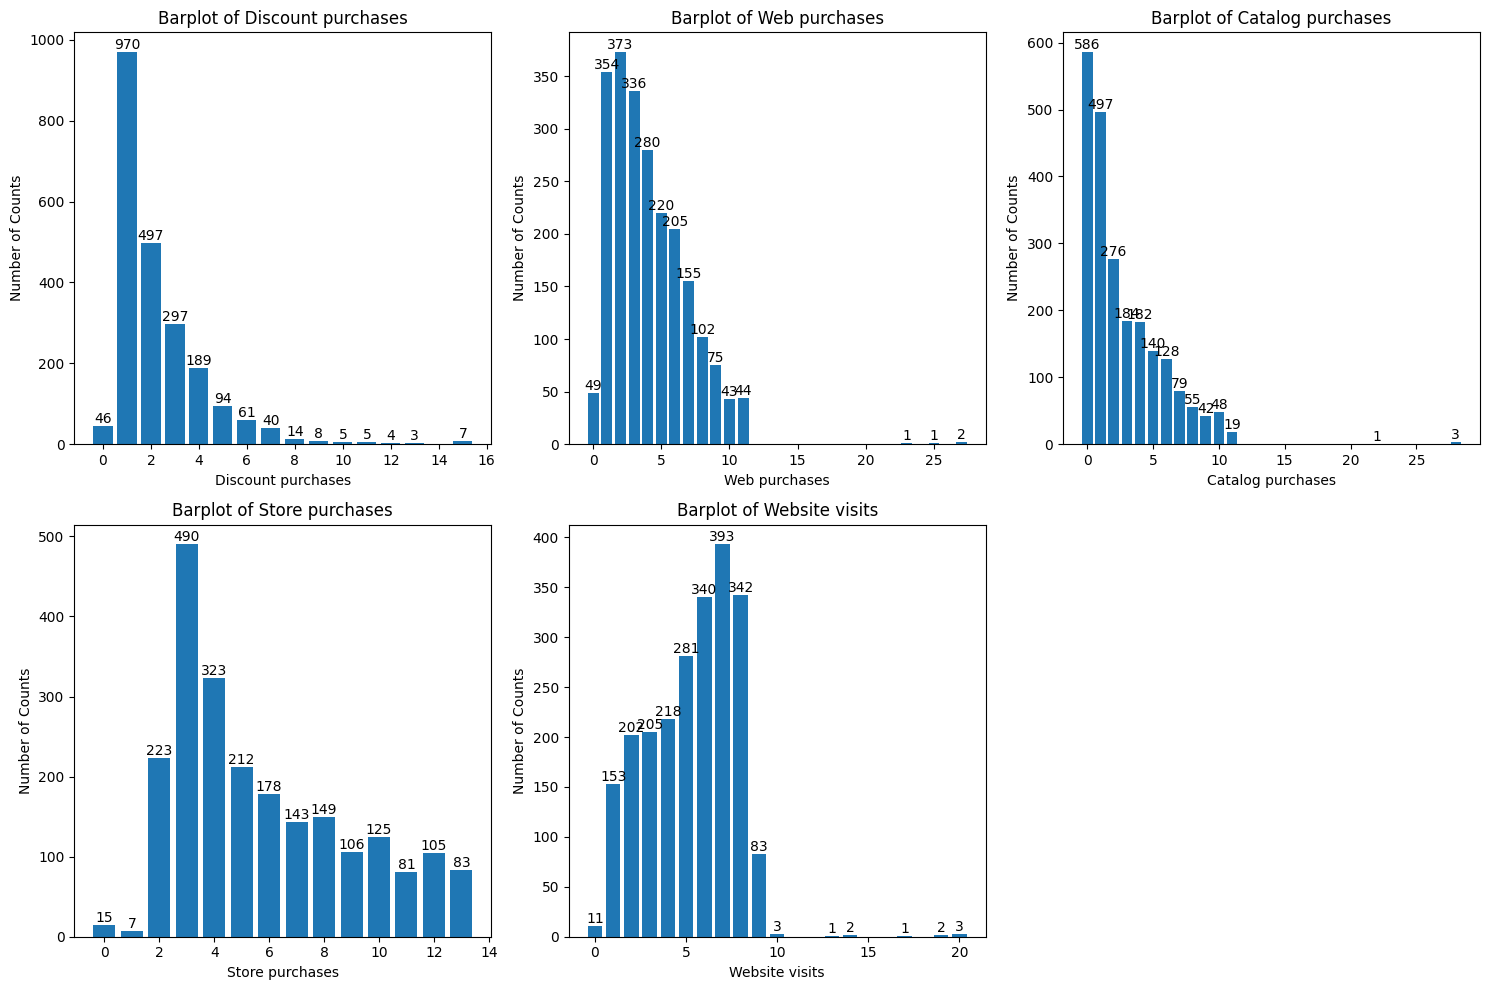

In [73]:
columns=["Discount_purchases", "Web_purchases", "Catalog_purchases", "Store_purchases", "Website_visits"]


fig, axs = plt.subplots(2,3, figsize=(15, 10))
axs = axs.flatten()

for i, column in enumerate(columns):
    ratings_count = df[column].value_counts().sort_index()
    bars = axs[i].bar(ratings_count.index, ratings_count.values)
    axs[i].bar_label(bars, labels=ratings_count.values, label_type='edge')
    axs[i].set_xlabel(column.replace("_", " "))
    axs[i].set_ylabel('Number of Counts')
    axs[i].set_title("Barplot of " + column.replace("_", " "))

axs[5].axis('off')

plt.tight_layout()
plt.show()

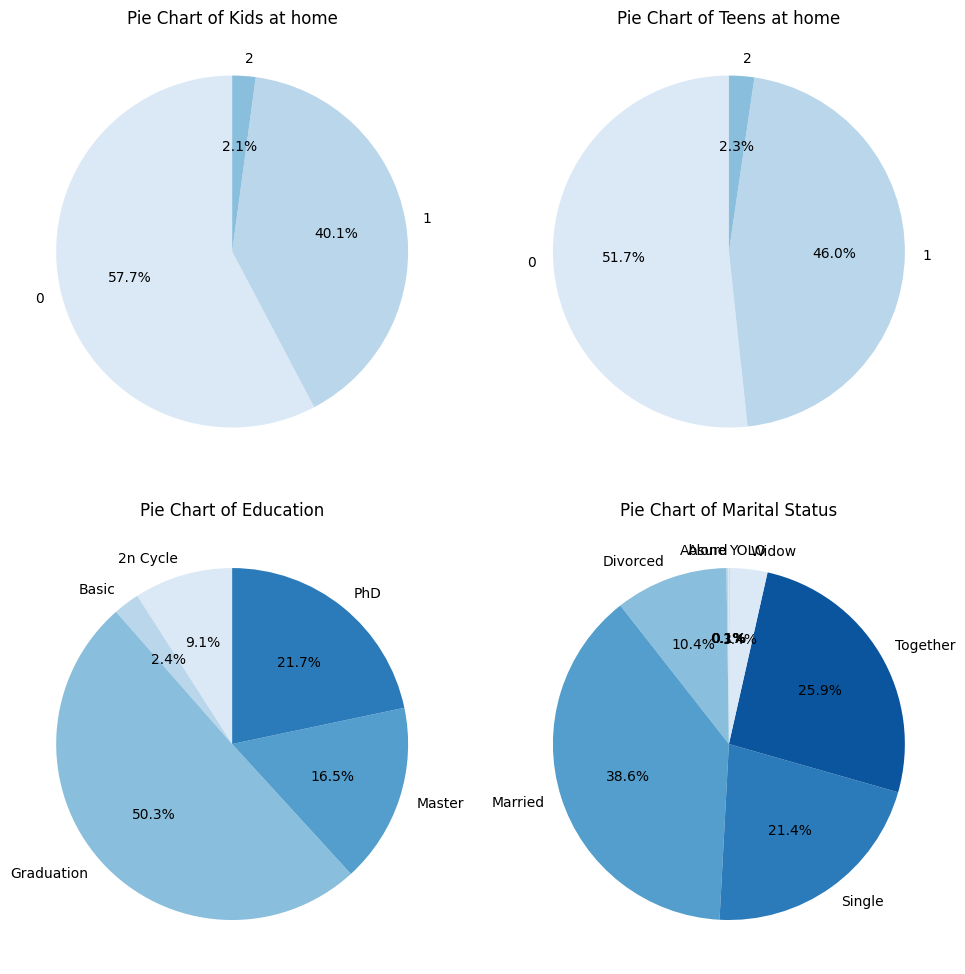

In [66]:
columns=["Kids_at_home", "Teens_at_home",'Education', 'Marital_Status']

fig, axs = plt.subplots(2,2, figsize=(10, 10))
axs = axs.flatten()

for i, column in enumerate(columns):
    ratings_count = df[column].value_counts(dropna=False).sort_index()
    axs[i].pie(ratings_count.values, labels=ratings_count.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Blues"))
    axs[i].set_title(f"Pie Chart of {column.replace('_', ' ')}", fontsize=12)



plt.tight_layout()
plt.show()

Visualization of continuous variables, variables that have range ("Age", "Years_of_Experience", "Hours_Worked_Per_Week") <br>
Visualization of discrete variables: numerical values that are countable ("Number_of_Virtual_Meetings")<br>
Those visualizations will give us better insight about data for example if we have outliners...

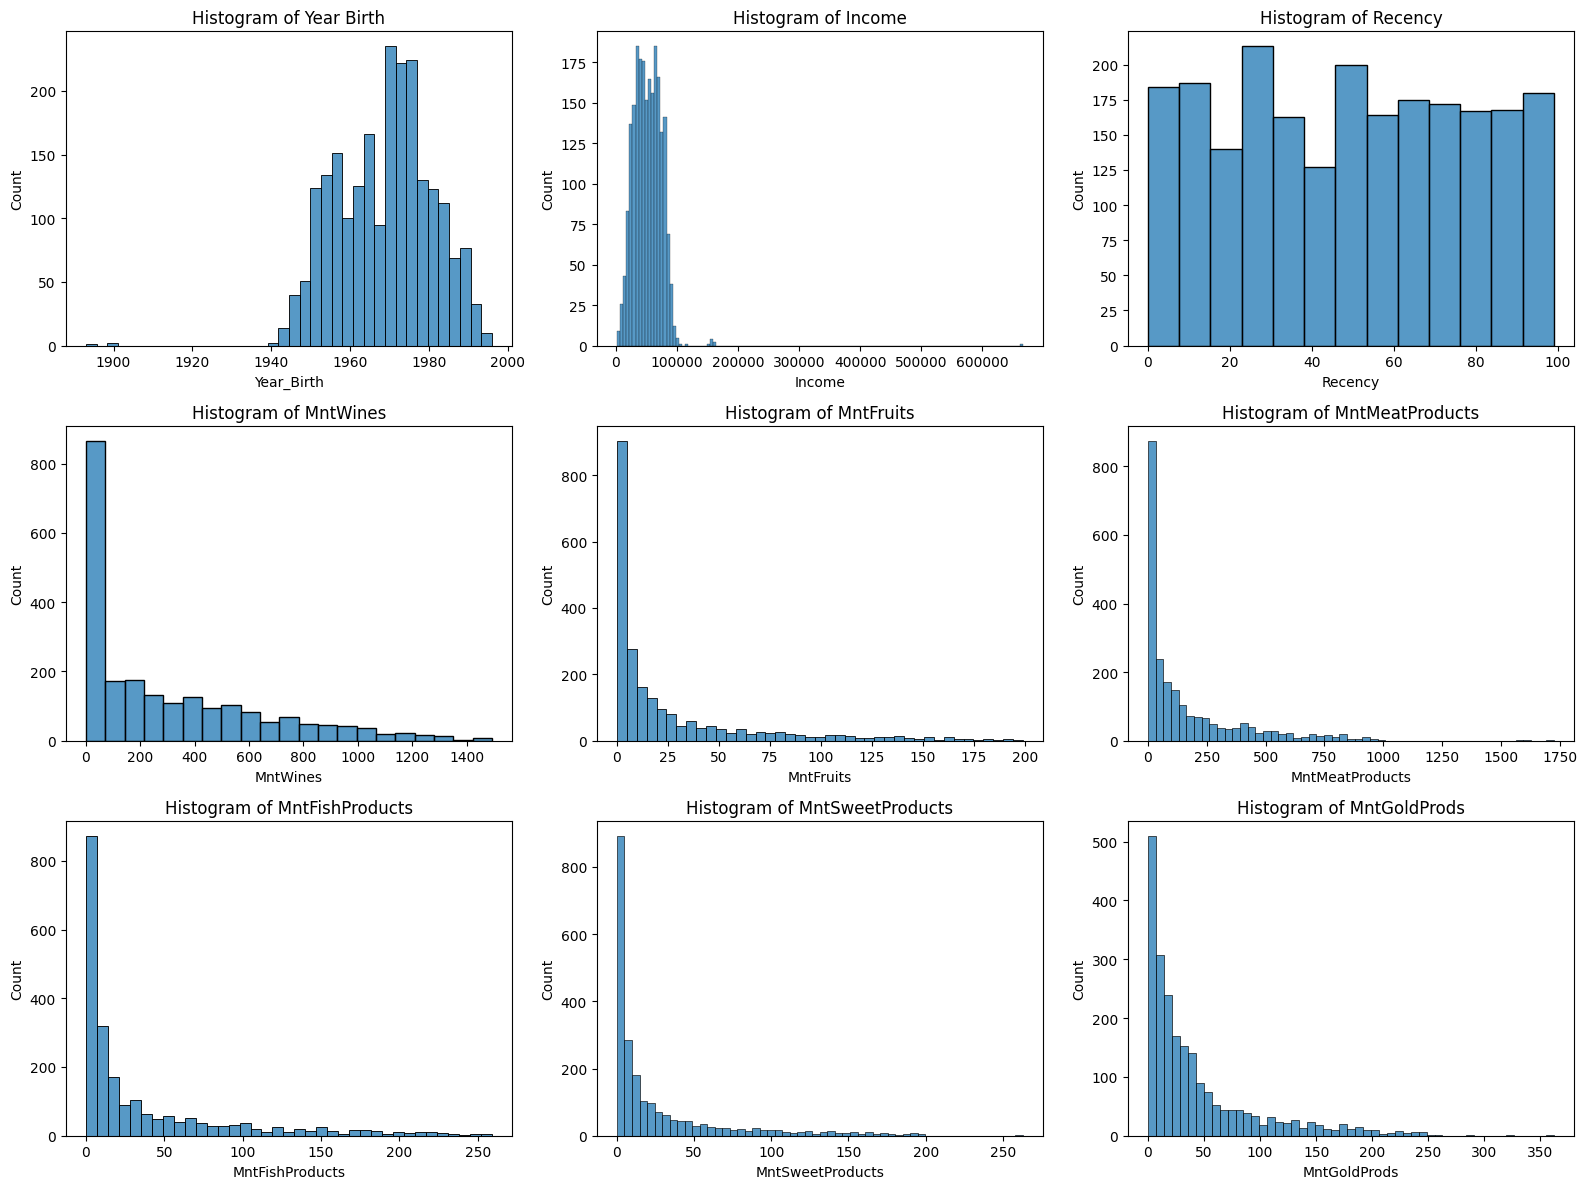

In [ ]:
#plt.subplots() creates a plot with 4 subplots, 2 per row in 2 different rows
#figyre is the container for the plot; axs is 2X2 array
figure, axs = plt.subplots(3, 3, figsize=(16, 12))
# flattens 2D array of axes objects into 1D array
axs = axs.flatten()

#list of columns that will be used in the plot
columns = ["Year_Birth", "Income", "Recency", "MntWines", "MntFruits", 
        "MntMeatProducts", "MntFishProducts", 'MntSweetProducts',
        'MntGoldProds',]

#iterates through names of the columns from df that are saved in a list columns
#sns.histplot(df[column], ax=axs[i]) plots a histrogram of the specified column on the corresponding subplot axis
for i, column in enumerate(columns):
    sns.histplot(df[column], ax=axs[i])
    axs[i].set_title("Histogram of " + column.replace("_", " "))

#to avoid charts overlapping
plt.tight_layout()
plt.show()


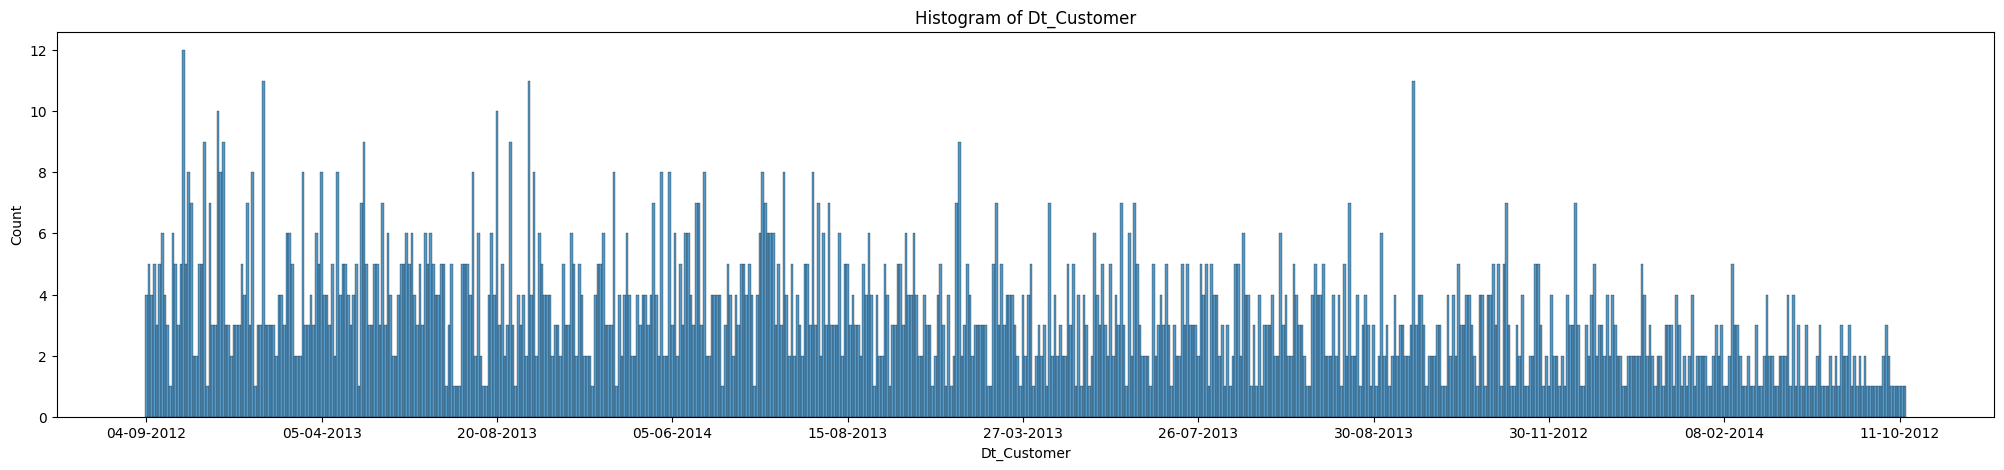

In [ ]:
plt.figure(figsize=(25, 5))
dtGraf = sns.histplot(df["Dt_Customer"])
dtGraf.set_title("Histogram of Dt_Customer")
dtGraf.set_xticks(dtGraf.get_xticks()[::len(dtGraf.get_xticks()) // 10])

Here will be presenteed ordinal variables with numerical data. <br>
Those are variables that have values have different categories but there is ranking between them.

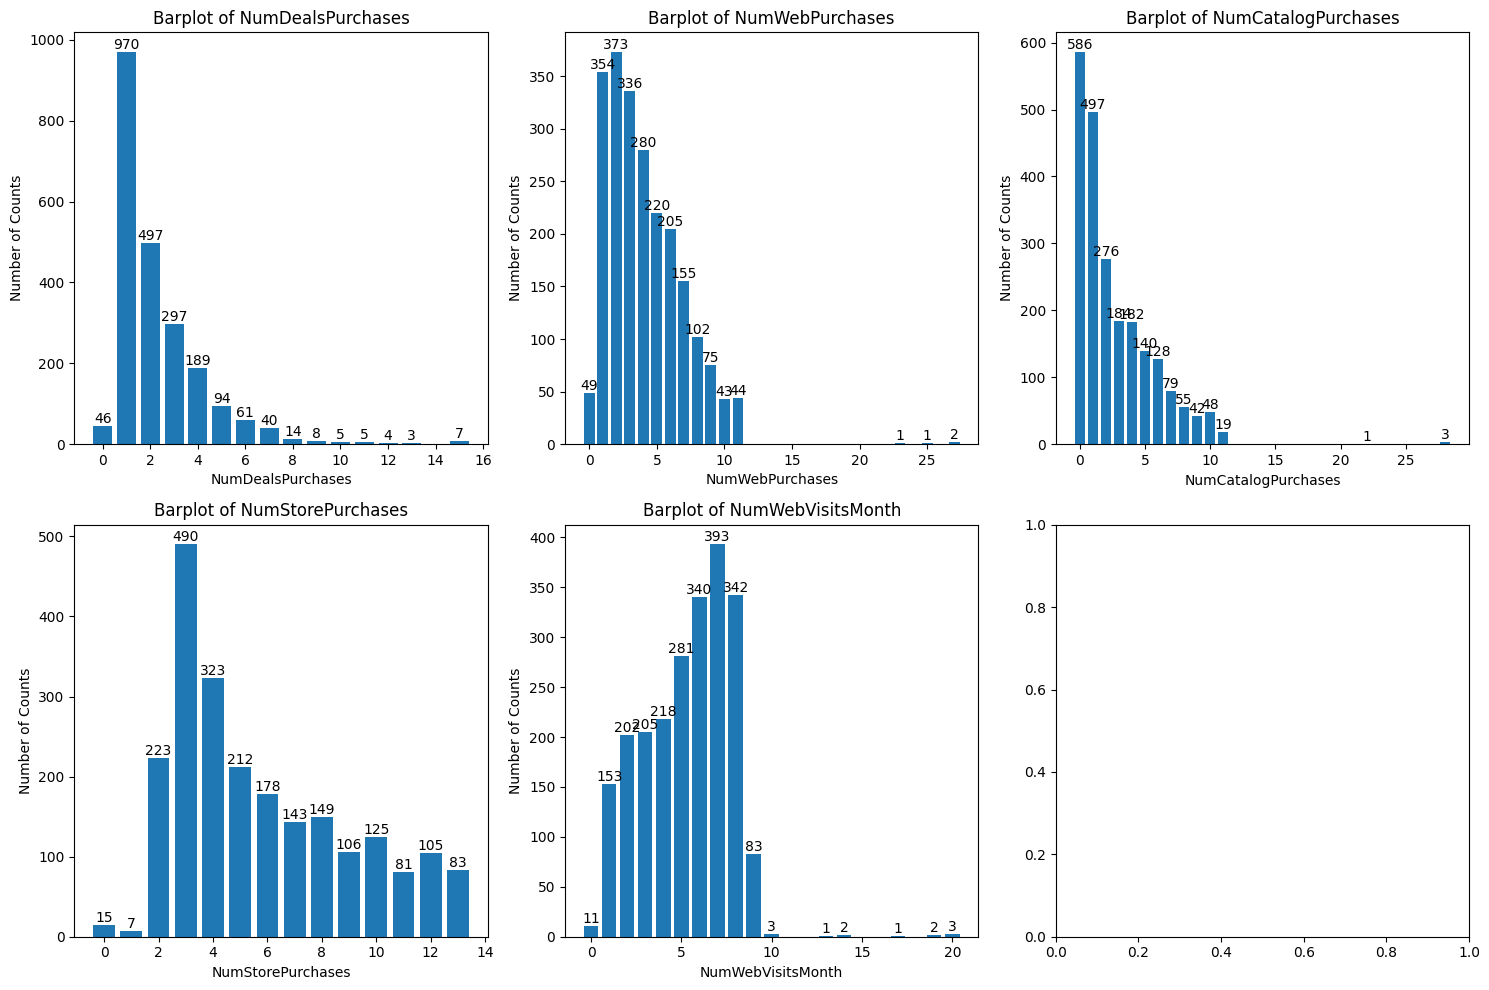

Here will be presenteed ordinal variables with textual data. <br>
Those are variables that have values have different categories but there is ranking between them.

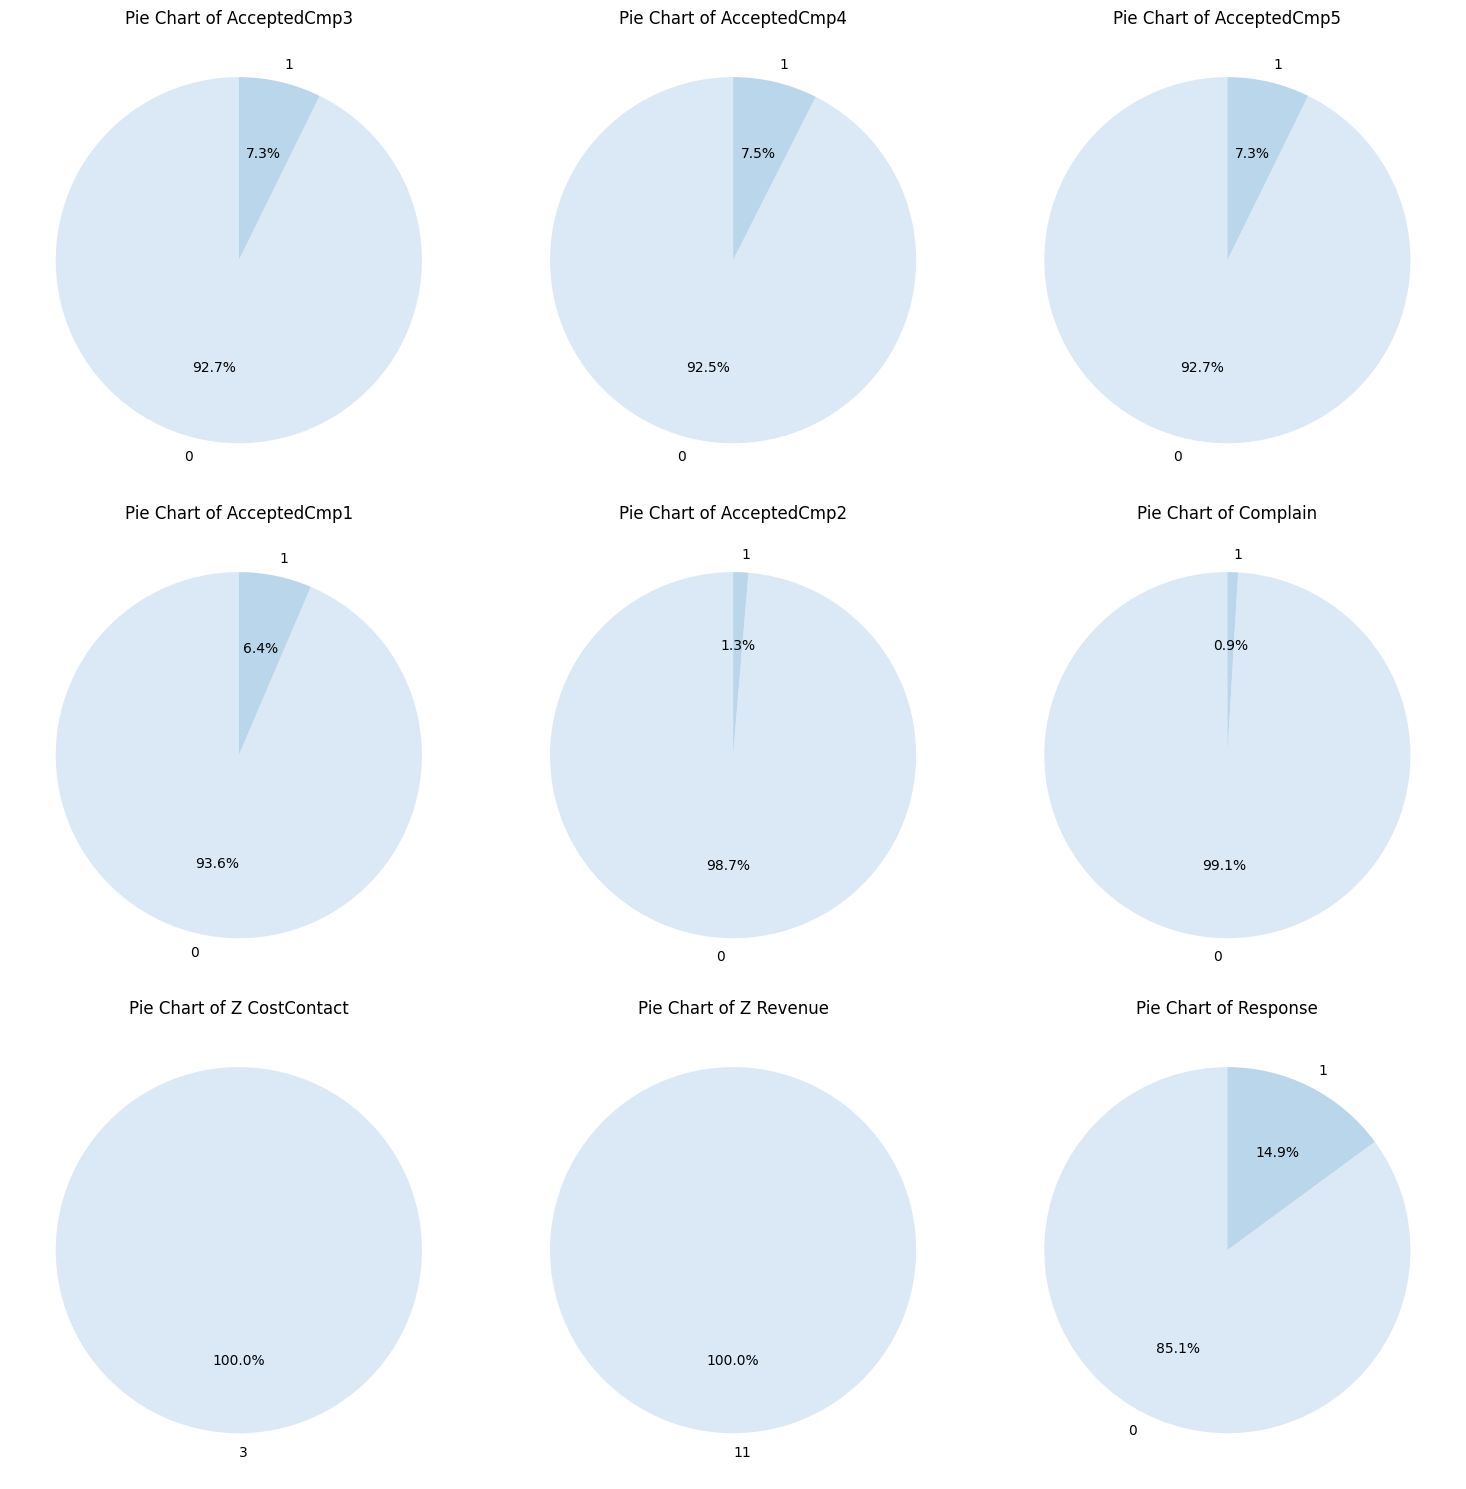

In [ ]:
columns=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

fig, axs = plt.subplots(3,3, figsize=(15, 15))
axs = axs.flatten()

for i, column in enumerate(columns):
    ratings_count = df[column].value_counts(dropna=False).sort_index()
    axs[i].pie(ratings_count.values, labels=ratings_count.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Blues"))
    axs[i].set_title(f"Pie Chart of {column.replace('_', ' ')}", fontsize=12)



plt.tight_layout()
plt.show()

In [ ]:

df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

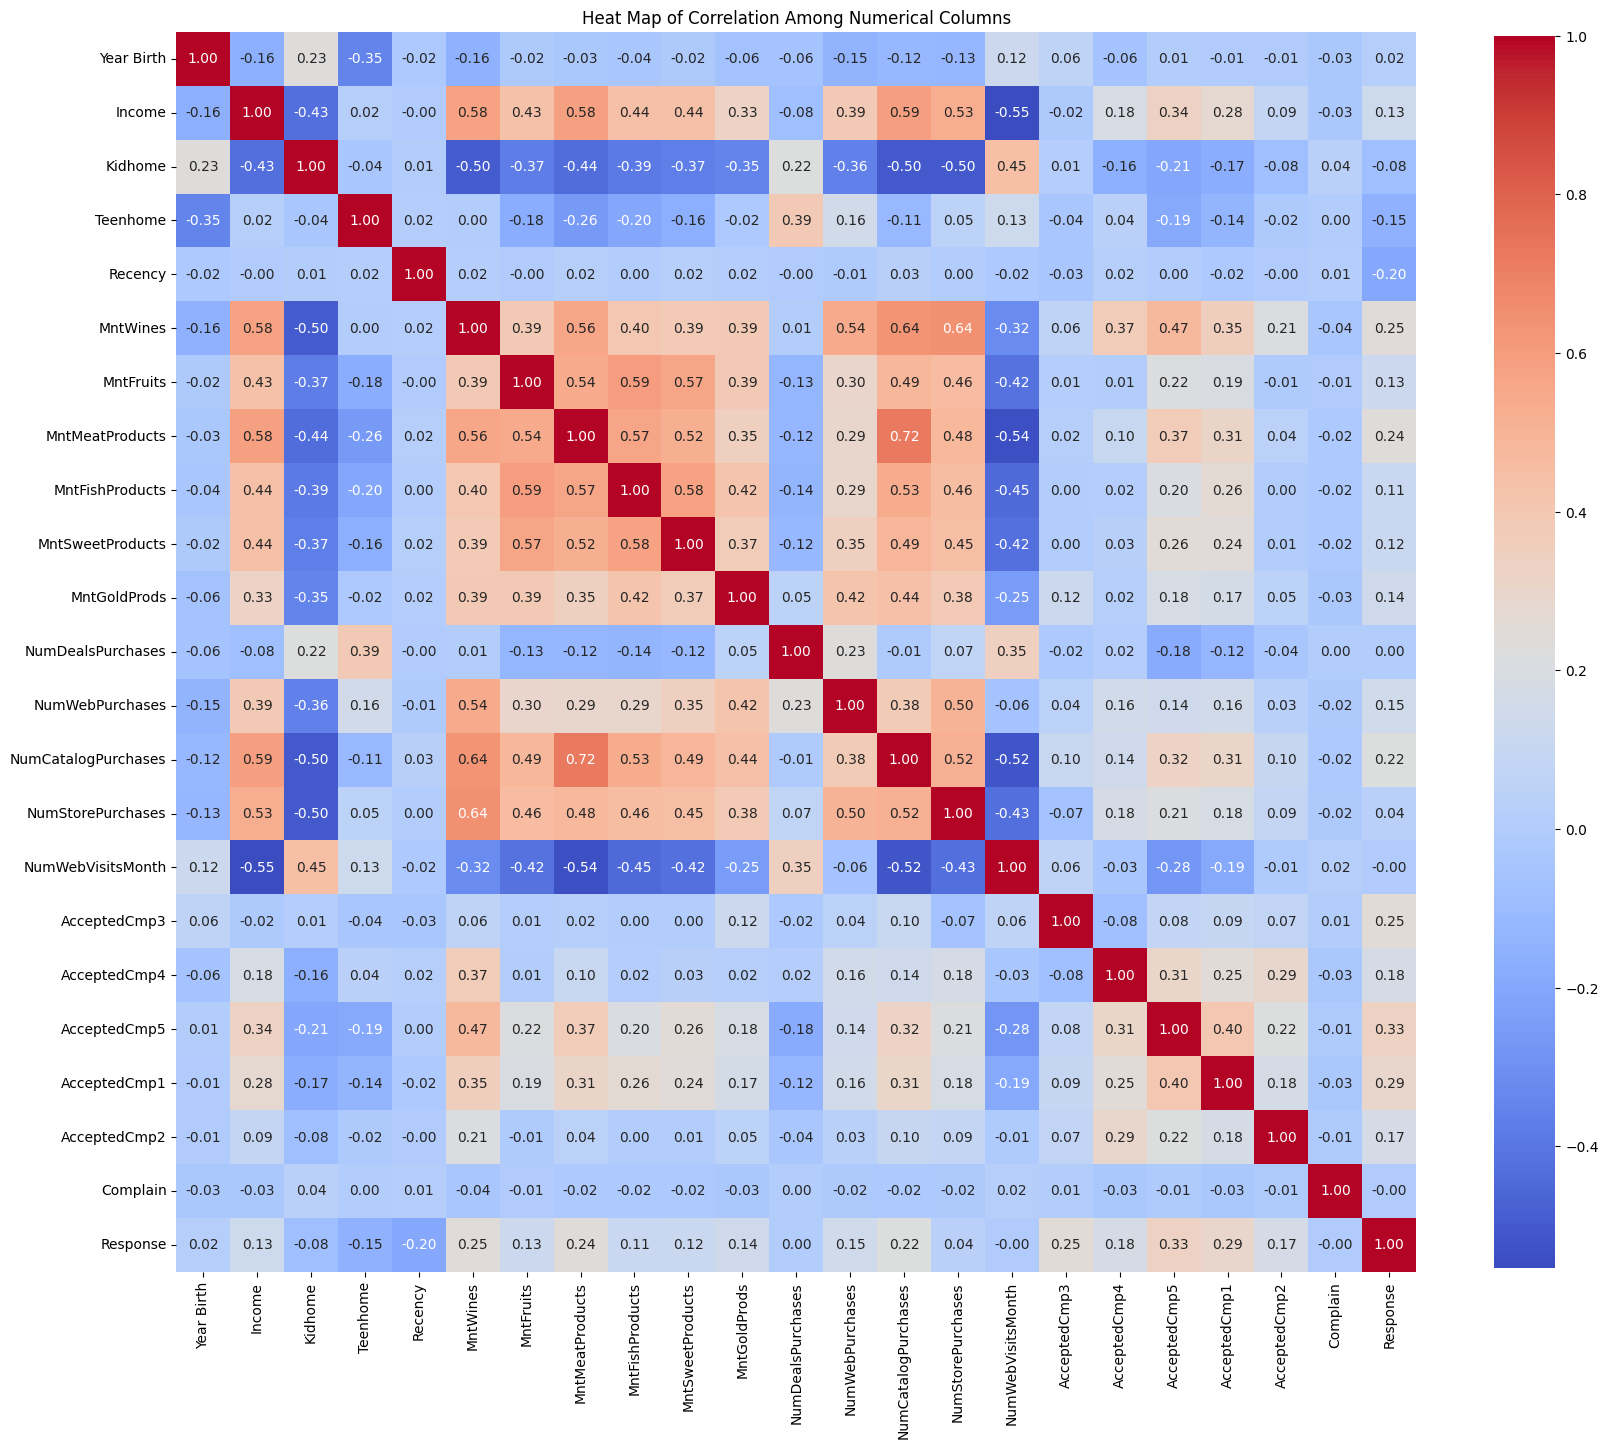

In [ ]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
numerical_df = numerical_df.drop(columns=['ID', 'Z CostContact', 'Z Revenue'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heat Map of Correlation Among Numerical Columns')
plt.show()



